In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset=pd.read_csv("train-data.csv")
dataset.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
dataset=dataset.iloc[:,1:]
dataset.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [5]:
dataset.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [6]:
dataset.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [7]:
dataset=dataset[dataset["Mileage"].notna()]
dataset=dataset[dataset["Engine"].notna()]
dataset=dataset[dataset["Power"].notna()]
dataset=dataset[dataset["Seats"].notna()]
dataset.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            5152
Price                   0
dtype: int64

In [8]:
dataset.drop(['New_Price'],axis=1,inplace=True)
dataset.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [9]:
dataset.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [10]:
dataset=dataset.reset_index(drop=True)

In [11]:
for i in range(dataset.shape[0]):
    dataset.at[i,'Company']=dataset['Name'][i].split()[0]
    dataset.at[i,'Mileage(kmpl)']=dataset['Mileage'][i].split()[0]
    dataset.at[i,'Engine CC']=dataset['Engine'][i].split()[0]
    dataset.at[i,'Power bhp']=dataset['Power'][i].split()[0]

In [12]:
dataset.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Mileage(kmpl),Engine CC,Power bhp
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,26.6,998,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,19.67,1582,126.2
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,18.2,1199,88.7
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,20.77,1248,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,15.2,1968,140.8


In [13]:
print(dataset['Location'].unique())
print(dataset['Transmission'].unique())
print(dataset['Fuel_Type'].unique())
print(dataset['Owner_Type'].unique())
print(dataset['Company'].unique())

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
['Manual' 'Automatic']
['CNG' 'Diesel' 'Petrol' 'LPG']
['First' 'Second' 'Fourth & Above' 'Third']
['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini']


In [14]:
print(dataset['Location'].nunique())
print(dataset['Transmission'].nunique())
print(dataset['Fuel_Type'].nunique())
print(dataset['Owner_Type'].nunique())
print(dataset['Company'].nunique())

11
2
4
4
31


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
 12  Company            5975 non-null   object 
 13  Mileage(kmpl)      5975 non-null   object 
 14  Engine CC          5975 non-null   object 
 15  Power bhp          5975 non-null   object 
dtypes: float64(2), int64(2),

In [16]:
dataset['Mileage(kmpl)']=dataset['Mileage(kmpl)'].astype(float)
dataset['Engine CC']=dataset['Engine CC'].astype(float)

In [17]:
position=[]
for i in range(dataset.shape[0]):
    if dataset['Power bhp'][i]=='null':
        position.append(i)
print(position)        

[76, 79, 89, 120, 143, 225, 242, 259, 304, 305, 383, 421, 425, 440, 469, 572, 628, 644, 645, 735, 744, 824, 910, 921, 929, 1063, 1138, 1148, 1266, 1313, 1338, 1380, 1411, 1546, 1569, 1640, 1663, 1848, 1989, 2043, 2118, 2152, 2250, 2254, 2292, 2328, 2377, 2425, 2434, 2481, 2485, 2511, 2561, 2579, 2616, 2621, 2868, 3010, 3038, 3081, 3166, 3224, 3266, 3414, 3491, 3506, 3562, 3601, 3611, 3618, 3642, 3706, 3868, 3900, 3969, 4046, 4049, 4318, 4321, 4593, 4672, 4676, 4706, 4792, 4848, 4862, 4914, 5024, 5078, 5186, 5383, 5395, 5415, 5486, 5490, 5604, 5712, 5716, 5818, 5830, 5881, 5899, 5941]


In [18]:
dataset=dataset.drop(dataset.index[position])
dataset=dataset.reset_index(drop=True)

In [19]:
dataset.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Mileage(kmpl),Engine CC,Power bhp
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,19.67,1582.0,126.2
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,18.20,1199.0,88.7
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,15.20,1968.0,140.8


In [20]:
dataset.drop(['Name','Mileage','Engine','Power'],axis=1,inplace=True)
dataset.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(kmpl),Engine CC,Power bhp
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,Maruti,26.60,998.0,58.16
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,Hyundai,19.67,1582.0,126.2
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,Honda,18.20,1199.0,88.7
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,Maruti,20.77,1248.0,88.76
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,Audi,15.20,1968.0,140.8


In [21]:
dataset['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [22]:
dataset.replace({'First':1,'Second':2,'Third':3,'Fourth & Above':4},inplace=True)

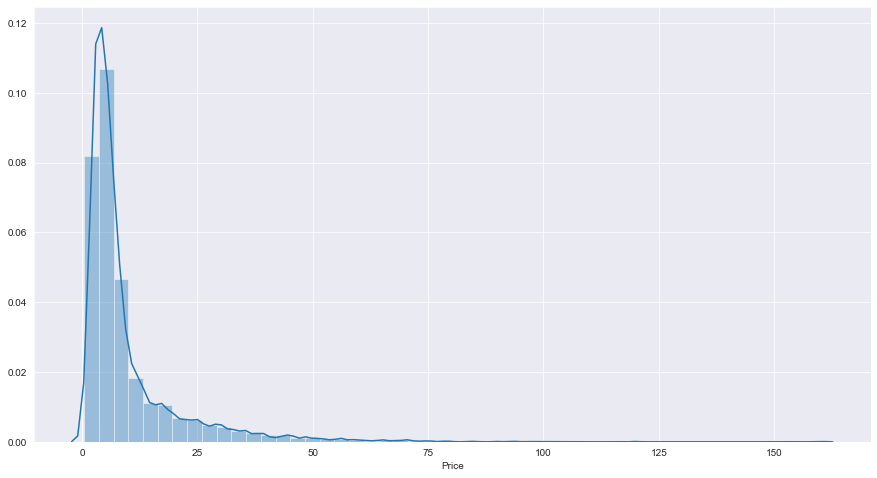

In [23]:
plt.figure(figsize=(15,8))
sns.set_style("darkgrid")
sns.distplot(dataset['Price'])

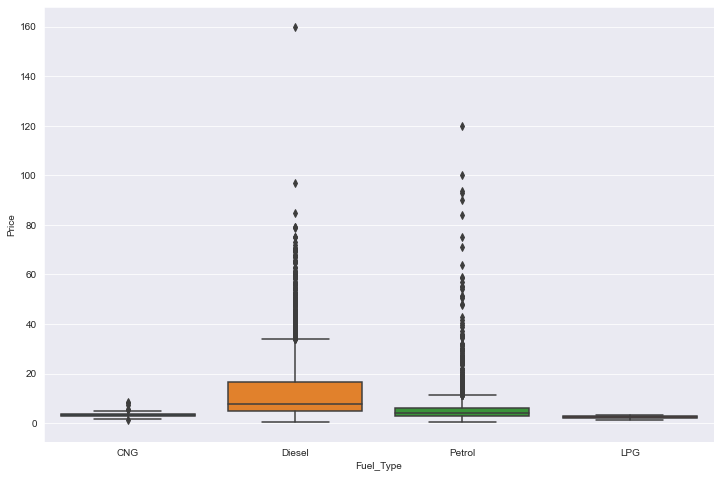

In [24]:
plt.figure(figsize=(12,8))
var='Fuel_Type'
data=pd.concat([dataset['Price'],dataset[var]],axis=1)
sns.boxplot(x=var,y="Price",data=data)

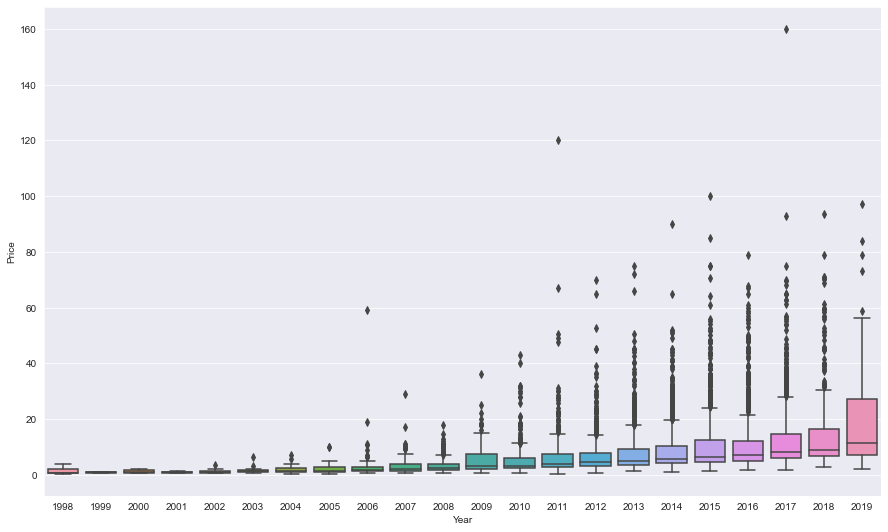

In [25]:
plt.figure(figsize=(15,9))
var='Year'
data=pd.concat([dataset['Price'],dataset[var]],axis=1)
sns.boxplot(x=var,y="Price",data=data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

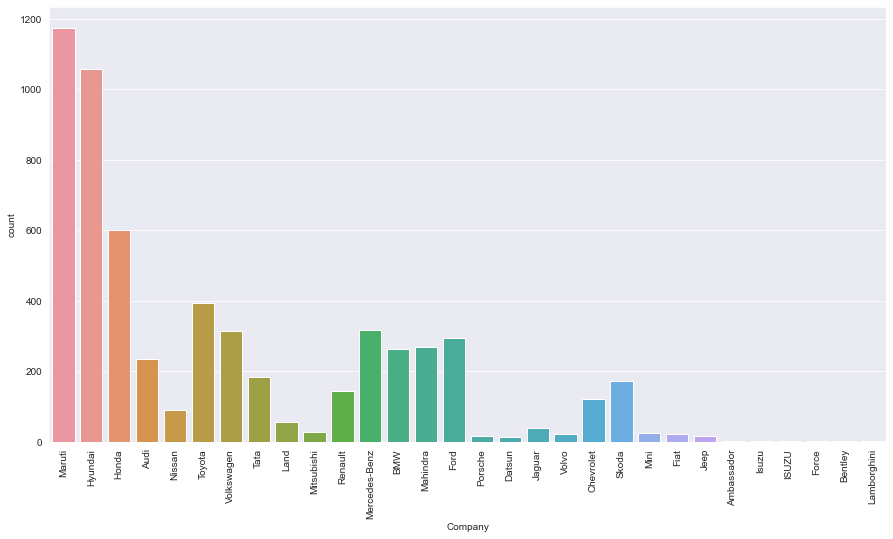

In [26]:
plt.figure(figsize=(15,8))
sns.countplot(x="Company",data=dataset)
plt.xticks(rotation=90)

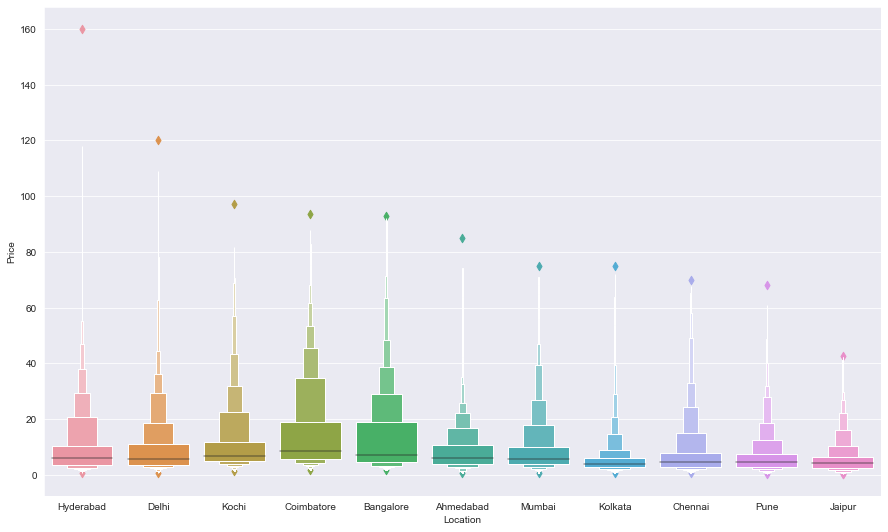

In [27]:
plt.figure(figsize=(15,9))
sns.boxenplot(x='Location',y='Price',data=dataset.sort_values('Price',ascending=False))

In [28]:
locations=pd.get_dummies(dataset['Location'],drop_first=True)
locations

,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5867,0,0,0,1,0,0,0,0,0,0
5868,0,0,0,0,0,1,0,0,0,0
5869,0,0,0,0,0,1,0,0,0,0
5870,0,0,0,0,0,0,0,1,0,0


In [29]:
dataset.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(kmpl),Engine CC,Power bhp
0,Mumbai,2010,72000,CNG,Manual,1,5.0,1.75,Maruti,26.60,998.0,58.16
1,Pune,2015,41000,Diesel,Manual,1,5.0,12.50,Hyundai,19.67,1582.0,126.2
2,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,Honda,18.20,1199.0,88.7
3,Chennai,2012,87000,Diesel,Manual,1,7.0,6.00,Maruti,20.77,1248.0,88.76
4,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,17.74,Audi,15.20,1968.0,140.8


In [30]:
dataset['Year']=2019-dataset['Year']

In [31]:
dataset.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(kmpl),Engine CC,Power bhp
0,Mumbai,9,72000,CNG,Manual,1,5.0,1.75,Maruti,26.60,998.0,58.16
1,Pune,4,41000,Diesel,Manual,1,5.0,12.50,Hyundai,19.67,1582.0,126.2
2,Chennai,8,46000,Petrol,Manual,1,5.0,4.50,Honda,18.20,1199.0,88.7
3,Chennai,7,87000,Diesel,Manual,1,7.0,6.00,Maruti,20.77,1248.0,88.76
4,Coimbatore,6,40670,Diesel,Automatic,2,5.0,17.74,Audi,15.20,1968.0,140.8


In [32]:
fuel=pd.get_dummies(dataset['Fuel_Type'],drop_first=True)
transmission=pd.get_dummies(dataset['Transmission'],drop_first=True)

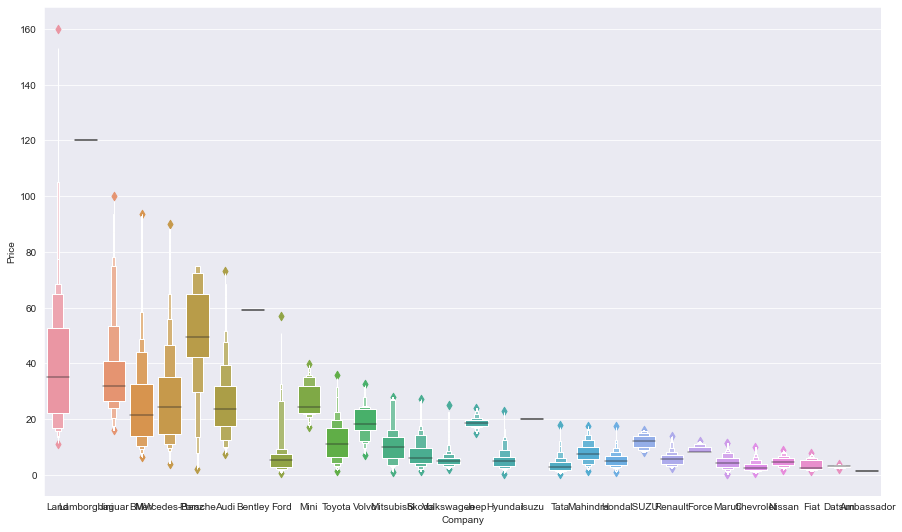

In [33]:
plt.figure(figsize=(15,9))
sns.boxenplot(x='Company',y='Price',data=dataset.sort_values('Price',ascending=False))

In [34]:
c=dict(dataset['Company'].value_counts())

In [35]:
dataset=pd.concat([dataset,locations,fuel,transmission],axis=1)
dataset.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(kmpl),...,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Diesel,LPG,Petrol,Manual
0,Mumbai,9,72000,CNG,Manual,1,5.0,1.75,Maruti,26.60,...,0,0,0,0,1,0,0,0,0,1
1,Pune,4,41000,Diesel,Manual,1,5.0,12.50,Hyundai,19.67,...,0,0,0,0,0,1,1,0,0,1
2,Chennai,8,46000,Petrol,Manual,1,5.0,4.50,Honda,18.20,...,0,0,0,0,0,0,0,0,1,1
3,Chennai,7,87000,Diesel,Manual,1,7.0,6.00,Maruti,20.77,...,0,0,0,0,0,0,1,0,0,1
4,Coimbatore,6,40670,Diesel,Automatic,2,5.0,17.74,Audi,15.20,...,0,0,0,0,0,0,1,0,0,0


In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5872 non-null   object 
 1   Year               5872 non-null   int64  
 2   Kilometers_Driven  5872 non-null   int64  
 3   Fuel_Type          5872 non-null   object 
 4   Transmission       5872 non-null   object 
 5   Owner_Type         5872 non-null   int64  
 6   Seats              5872 non-null   float64
 7   Price              5872 non-null   float64
 8   Company            5872 non-null   object 
 9   Mileage(kmpl)      5872 non-null   float64
 10  Engine CC          5872 non-null   float64
 11  Power bhp          5872 non-null   object 
 12  Bangalore          5872 non-null   uint8  
 13  Chennai            5872 non-null   uint8  
 14  Coimbatore         5872 non-null   uint8  
 15  Delhi              5872 non-null   uint8  
 16  Hyderabad          5872 

In [37]:
dataset['Power bhp']=dataset['Power bhp'].astype(float)

dataset.drop(['Location','Fuel_Type','Transmission'],axis=1,inplace=True)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               5872 non-null   int64  
 1   Kilometers_Driven  5872 non-null   int64  
 2   Owner_Type         5872 non-null   int64  
 3   Seats              5872 non-null   float64
 4   Price              5872 non-null   float64
 5   Company            5872 non-null   object 
 6   Mileage(kmpl)      5872 non-null   float64
 7   Engine CC          5872 non-null   float64
 8   Power bhp          5872 non-null   float64
 9   Bangalore          5872 non-null   uint8  
 10  Chennai            5872 non-null   uint8  
 11  Coimbatore         5872 non-null   uint8  
 12  Delhi              5872 non-null   uint8  
 13  Hyderabad          5872 non-null   uint8  
 14  Jaipur             5872 non-null   uint8  
 15  Kochi              5872 non-null   uint8  
 16  Kolkata            5872 

In [38]:
dataset['Company']=dataset['Company'].map(c)

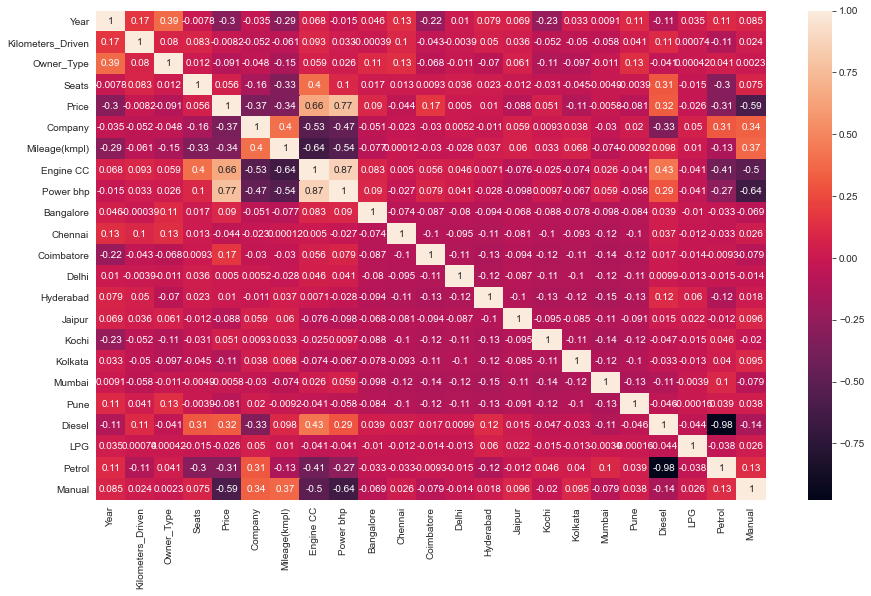

In [39]:
plt.figure(figsize=(15,9))
sns.heatmap(dataset.corr(),annot=True)

In [40]:
dataset.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Price,Company,Mileage(kmpl),Engine CC,Power bhp,Bangalore,...,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Diesel,LPG,Petrol,Manual
0,9,72000,1,5.0,1.75,1175,26.60,998.0,58.16,0,...,0,0,0,0,1,0,0,0,0,1
1,4,41000,1,5.0,12.50,1058,19.67,1582.0,126.20,0,...,0,0,0,0,0,1,1,0,0,1
2,8,46000,1,5.0,4.50,600,18.20,1199.0,88.70,0,...,0,0,0,0,0,0,0,0,1,1
3,7,87000,1,7.0,6.00,1175,20.77,1248.0,88.76,0,...,0,0,0,0,0,0,1,0,0,1
4,6,40670,2,5.0,17.74,235,15.20,1968.0,140.80,0,...,0,0,0,0,0,0,1,0,0,0


In [41]:
dataset.columns

Index(['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats', 'Price', 'Company',
       'Mileage(kmpl)', 'Engine CC', 'Power bhp', 'Bangalore', 'Chennai',
       'Coimbatore', 'Delhi', 'Hyderabad', 'Jaipur', 'Kochi', 'Kolkata',
       'Mumbai', 'Pune', 'Diesel', 'LPG', 'Petrol', 'Manual'],
      dtype='object')

In [42]:
test_data=pd.read_csv("test-data.csv")

test_data = test_data.iloc[:,1:]

print("Shape of test data Before dropping any Row: ",dataset.shape)
test_data = test_data[test_data['Mileage'].notna()]
print("Shape of test data After dropping Rows with NULL values in Mileage: ",test_data.shape)
test_data = test_data[test_data['Engine'].notna()]
print("Shape of test data After dropping Rows with NULL values in Engine : ",test_data.shape)
test_data = test_data[test_data['Power'].notna()]
print("Shape of test data After dropping Rows with NULL values in Power  : ",test_data.shape)
test_data = test_data[test_data['Seats'].notna()]
print("Shape of test data After dropping Rows with NULL values in Seats  : ",test_data.shape)
print('Droping null done')

test_data = test_data.reset_index(drop=True)
print('Index reset done')

for i in range(test_data.shape[0]):
    test_data.at[i, 'Mileage(km/kg)'] = test_data['Mileage'][i].split()[0]
    test_data.at[i, 'Engine(CC)'] = test_data['Engine'][i].split()[0]
    test_data.at[i, 'Power(bhp)'] = test_data['Power'][i].split()[0]
print('Split Done') 

test_data['Mileage(km/kg)'] = test_data['Mileage(km/kg)'].astype(float)
test_data['Engine(CC)'] = test_data['Engine(CC)'].astype(float)
print('casting 1 Done') 

position = []
for i in range(test_data.shape[0]):
    if test_data['Power(bhp)'][i]=='null':
        position.append(i)
        
test_data = test_data.drop(test_data.index[position])
test_data = test_data.reset_index(drop=True) 

test_data['Power(bhp)'] = test_data['Power(bhp)'].astype(float)
print('casting 2 Done') 

for i in range(test_data.shape[0]):
    if pd.isnull(test_data.loc[i,'New_Price']) == False:
        test_data.at[i,'New_car_Price'] = test_data['New_Price'][i].split()[0]

test_data['New_car_Price'] = test_data['New_car_Price'].astype(float)

test_data.drop(["Name"],axis=1,inplace=True)
test_data.drop(["Mileage"],axis=1,inplace=True)
test_data.drop(["Engine"],axis=1,inplace=True)
test_data.drop(["Power"],axis=1,inplace=True)
test_data.drop(["New_Price"],axis=1,inplace=True)

var = 'Location'
Location = test_data[[var]]
Location = pd.get_dummies(Location,drop_first=True)
Location.head()

var = 'Fuel_Type'
Fuel_t = test_data[[var]]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()

var = 'Transmission'
Transmission = test_data[[var]]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

test_data.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
test_data.head()

final_test= pd.concat([test_data,Location,Fuel_t,Transmission],axis=1)
final_test.head()

final_test.drop(["Location","Fuel_Type","Transmission","New_car_Price"],axis=1,inplace=True)
final_test.head()

print("Final Test Size: ",final_test.shape)

Shape of test data Before dropping any Row:  (5872, 23)
Shape of test data After dropping Rows with NULL values in Mileage:  (1234, 12)
Shape of test data After dropping Rows with NULL values in Engine :  (1224, 12)
Shape of test data After dropping Rows with NULL values in Power  :  (1224, 12)
Shape of test data After dropping Rows with NULL values in Seats  :  (1223, 12)
Droping null done
Index reset done
Split Done
casting 1 Done
casting 2 Done
Final Test Size:  (1201, 21)


In [43]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(dataset.drop(['Price','Company'],axis=1),dataset['Price'],test_size=0.2,random_state=0)

from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100)
regressor.fit(xtrain,ytrain)

ypred=regressor.predict(xtest)
from sklearn.metrics import r2_score
print(r2_score(ytest,ypred))

0.9136591463533011


In [44]:
final_test.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Mileage(km/kg),Engine(CC),Power(bhp),Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2014,40929,1,4.0,32.26,998.0,58.20,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2013,54493,2,5.0,24.70,796.0,47.30,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,2017,34000,1,7.0,13.68,2393.0,147.80,0,0,0,...,0,0,0,0,1,0,1,0,0,1
3,2014,29000,1,5.0,18.50,1197.0,82.85,0,0,0,...,0,0,0,0,1,0,0,0,1,1
4,2016,85609,2,7.0,16.00,2179.0,140.00,0,0,1,...,0,0,0,0,0,0,1,0,0,1


In [45]:
from sklearn.model_selection import cross_val_score
result=cross_val_score(regressor,dataset.drop(['Price','Company'],axis=1),dataset['Price'],cv=10)

In [46]:
print(result)
result.mean()

[0.91026732 0.92268845 0.88465906 0.91054141 0.94715192 0.80105271
 0.78562882 0.92529175 0.88939969 0.8515987 ]


0.8828279822750293

In [47]:
from sklearn.model_selection import RandomizedSearchCV
regressor=RandomForestRegressor()

params={
    'n_estimators':[50,100,150,180,200,300],
    'max_depth':[2,4,5,8,10,None],
    'max_leaf_nodes':[None,1,2,3],
    'min_samples_split':[1,2,3],
    'min_samples_leaf':[1,2,3,4]
}
model=RandomizedSearchCV(regressor,param_distributions=params,n_iter=15,scoring='neg_mean_squared_error',n_jobs=-1,cv=5)

In [48]:
model.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 5, 8, 10, None],
                                        'max_leaf_nodes': [None, 1, 2, 3],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 3],
                                        'n_estimators': [50, 100, 150, 180, 200,
                                                         300]},
                   scoring='neg_mean_squared_error')

In [49]:
model.best_params_

{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_leaf_nodes': None,
 'max_depth': None}

In [50]:
model.best_estimator_

RandomForestRegressor(n_estimators=50)

In [51]:
ypred=model.predict(xtest)
print(r2_score(ytest,ypred))

0.9132161616337084


In [52]:
from sklearn.model_selection import cross_val_score
result=cross_val_score(regressor,dataset.drop(['Price','Company'],axis=1),dataset['Price'],cv=10)
result.mean()

0.885339334148774

In [53]:
import pickle
with open("trained_model.pickle","wb") as file:
    pickle.dump(model,file)

In [54]:
model=pickle.load(open("trained_model.pickle","rb"))

In [55]:
ypred=model.predict(xtest)
print(r2_score(ytest,ypred))

0.9132161616337084
